In [1]:
!python example_routing.py

INFO: run [2025-11-30T13:39:03+00:00] {'message': 'starting routing run'}
/Users/wrath/scratch/ship_routing_integrated/ship_routing/src/ship_routing/core/data.py:53: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 107. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_dataset(data_file, **kwargs)
/Users/wrath/scratch/ship_routing_integrated/ship_routing/src/ship_routing/core/data.py:53: UserWarning: The specified chunks separate the stored chunks along dimension "latitude" starting at index 395. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_dataset(data_file, **kwargs)
/Users/wrath/scratch/ship_routing_integrated/ship_routing/src/ship_routing/core/data.py:53: UserWarning: The specified chunks separate the stored chunks along dimension "longitude" starting at index 791. This could degrade performance. Instead, consider rechunking after loading.
  ds

In [2]:
from ship_routing.app.routing import RoutingResult
from matplotlib import pyplot as plt
import pandas as pd

<Axes: >

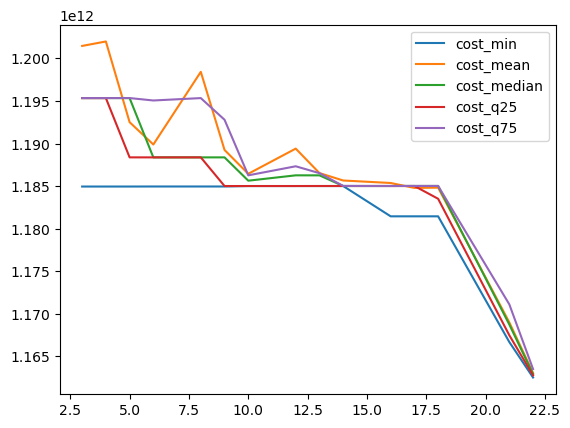

In [3]:
res = RoutingResult.load_json("runs/example_routing_result.json")
res.logs.to_dataframe().filter(like="cost_").drop(
    ["cost_std", "cost_max"], axis=1
).dropna().plot()

In [4]:
import shapely

In [5]:
r = [res.seed_member.route.line_string] + [
    m.route.line_string for m in res.elite_population.members
]
r

[<LINESTRING (-80.5 30, -79.039 30.517, -77.563 31.017, -76.072 31.5, -74.566...>,
 <LINESTRING (-80.5 30, -79.065 30.591, -77.471 30.842, -75.87 31.065, -74.30...>,
 <LINESTRING (-80.5 30, -79.065 30.591, -77.471 30.842, -75.87 31.065, -74.30...>,
 <LINESTRING (-80.5 30, -79.066 30.597, -77.471 30.838, -75.87 31.065, -74.30...>,
 <LINESTRING (-80.5 30, -79.066 30.597, -77.471 30.838, -75.87 31.065, -74.30...>,
 <LINESTRING (-80.5 30, -79.072 30.58, -77.473 30.847, -75.872 31.064, -74.30...>,
 <LINESTRING (-80.5 30, -79.064 30.572, -77.48 30.852, -75.872 31.066, -74.30...>,
 <LINESTRING (-80.5 30, -79.064 30.572, -77.48 30.852, -75.872 31.066, -74.30...>,
 <LINESTRING (-80.5 30, -79.064 30.572, -77.48 30.852, -75.872 31.066, -74.30...>]

In [6]:
c = [res.seed_member.cost] + [m.cost for m in res.elite_population.members]
c

[1195348324969.4453,
 1162774129335.4153,
 1162774129335.4153,
 1162933587119.4734,
 1162933587119.4734,
 1162536116986.4082,
 1163531046972.5762,
 1163523441248.2527,
 1163523441248.2527]

(array([8., 0., 0., 0., 0., 0., 1.]),
 array([1.16253612e+12, 1.16722358e+12, 1.17191103e+12, 1.17659849e+12,
        1.18128595e+12, 1.18597341e+12, 1.19066087e+12, 1.19534832e+12]),
 <BarContainer object of 7 artists>)

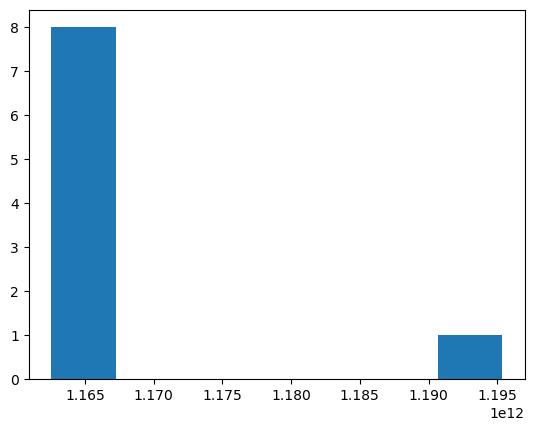

In [7]:
plt.hist(c, bins=7)

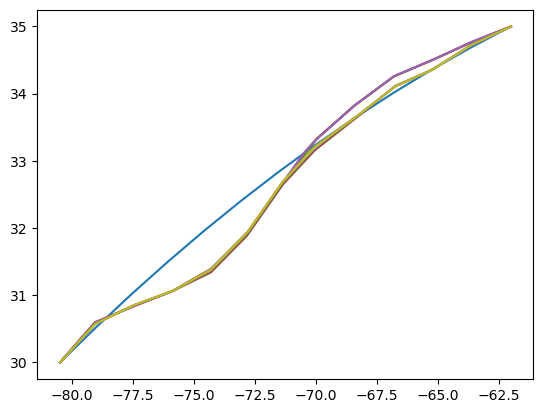

In [8]:
for _r in r:
    plt.plot(*_r.xy)